In [1]:
import arviz as az
import jax.numpy as jnp
import matplotlib.pylab as plt
import numpyro.distributions as dist
import numpy.random as rand
from scipy.stats import norm, uniform

from makeCorner import *

az.rcParams["plot.max_subplots"] = 90

In [39]:
# cdf_file = "/home/max.lalleman/CBC_Stoch_Search/gwbcbcmodeling/gwbcbcmodeling/New_Code_New_sample/Varying_Power_Law_Sigmoid/cdf_files/CBC_z_0_to_4_analysis_high_low_for_mMax.cdf"
# "./RUNS/CBC_O3_Power_Law.cdf"
cdf_file = "../data/RUNS/power_law_only_high_sigmoids.cdf"
data = az.from_netcdf(cdf_file)
samps = data.posterior.stack(draws=("chain", "draw"))

In [3]:
def sigmoid(low, delta, width, middle, zs):
    return delta / (1 + jnp.exp(-(1/width)*(zs - middle))) + low

def sigmoid_no_delta(low, high, width, middle, zs):
    return (high - low) / (1 + jnp.exp(-(1/width)*(zs - middle))) + low

zs = np.linspace(0,2,500)

In [4]:
new_priors = {
    "logR20":dist.Uniform(-2,1),
    "alpha_ref":dist.Normal(-2,3),
    "high_alpha":dist.Normal(-2,3),
    "width_alpha":dist.Uniform(-1,1),
    "middle_z_alpha":dist.Uniform(0,0.8),
    "mu_m1":dist.Uniform(15,60),
    "mMin":dist.Uniform(5,15),
    "high_mMin":dist.Uniform(5, 15),
    "width_mMin":dist.Uniform(-1,1),
    "middle_z_mMin":dist.Uniform(0,0.8),
    "bq":dist.Normal(0,3),
    "alpha_z":dist.Normal(0,4),
    "beta_z":dist.Uniform(0,10),
    "zp": dist.Uniform(0,4),
    "fpeak": dist.Uniform(-6,0),
    "high_f_peak": dist.Uniform(-6,0),
    "width_f_peak": dist.Uniform(-1,1),
    "middle_z_f_peak": dist.Uniform(0,0.8),
    "sig_m1": dist.Uniform(1.5,15),
    "mMax":dist.Uniform(50,100),
    "high_mMax":dist.Uniform(50, 100),
    "width_mMax":dist.Uniform(-1,1),
    "middle_z_mMax":dist.Uniform(0,0.8),
    "dmMax":dist.Uniform(0.5,1.5),
    "high_dmMax":dist.Uniform(0.5,1.5),
    "width_dmMax":dist.Uniform(-1,1),
    "middle_z_dmMax":dist.Uniform(0,0.8),
    "dmMin":dist.Uniform(-1,0.5),
    "high_dmMin":dist.Uniform(-1,0.5),
    "width_dmMin":dist.Uniform(-1,1),
    "middle_z_dmMin":dist.Uniform(0,0.8),
}

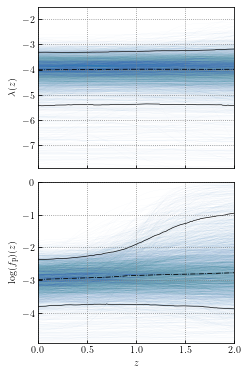

In [5]:
cm = 1/2.54
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(9*cm, 2*6.75*cm))

ax1.set_rasterization_zorder(2)
kappa_matrix = np.zeros((len(range(samps.alpha_ref.size)), len(zs)))
for i in range(samps.alpha_ref.size):
    kappa_r = sigmoid(samps.alpha_ref.values[i],
                               samps.delta_alpha.values[i],
                               10.**samps.log_width_alpha.values[i],
                               samps.middle_z_alpha.values[i],
                               zs,
                              )
    ax1.plot(zs, kappa_r, lw = 0.05, color='#1f78b4', alpha = 0.2, zorder = 1)
    kappa_matrix[i, :] = kappa_r

median_kappa = np.median(kappa_matrix, axis = 0)
ax1.set_ylim(-7.9, -1.5)
ax1.set_ylabel(r"$\lambda(z)$", fontsize = 10)
ax1.tick_params(axis='y', labelsize=10)
ax1.plot(zs, median_kappa, "-.", c="k", zorder = 1, lw = 0.8)
ax1.plot(zs,np.quantile(kappa_matrix,0.05,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)
ax1.plot(zs,np.quantile(kappa_matrix,0.95,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)


ax2.set_rasterization_zorder(2)
fpeak_matrix = np.zeros((len(range(samps.log_f_peak.size)), len(zs)))
for i in range(samps.log_f_peak.size):
    f_peak_r = sigmoid_no_delta(samps.log_f_peak.values[i],
                               samps.log_high_f_peak.values[i],
                               10.**samps.log_width_f_peak.values[i],
                               samps.middle_z_f_peak.values[i],
                               zs,
                              )
    ax2.plot(zs, f_peak_r, lw = 0.05, color='#1f78b4', alpha = 0.2, zorder = 1)
    fpeak_matrix[i, :] = f_peak_r

median_fpeak = np.median(fpeak_matrix, axis = 0)
ax2.set_xlim(0,2)
ax2.set_ylim(-4.9, 0)
ax2.set_xlabel(r"$z$", fontsize = 10)
ax2.set_ylabel(r"$\log(f_{\rm p})(z)$", fontsize = 10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax2.plot(zs, median_fpeak, "-.", c="k", zorder = 1, lw = 0.8)
ax2.plot(zs,np.quantile(fpeak_matrix,0.05,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)
ax2.plot(zs,np.quantile(fpeak_matrix,0.95,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)


plt.setp(ax1.get_xticklabels(), visible=False)

# Adjust layout
plt.tight_layout()
plt.savefig("Power_law_trace_one_plot.pdf", dpi=500, bbox_inches="tight")
plt.show()

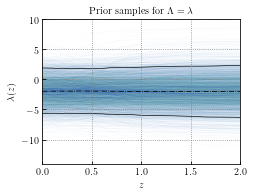

In [5]:
cm = 1/2.54
fig1, ax1 = plt.subplots(figsize=(9*cm, 6.75*cm))
ax1.set_rasterization_zorder(2)
lambda_matrix = np.zeros((len(range(samps.alpha_ref.size)), len(zs)))

prior_alpha_ref = rand.normal(-2,3, samps.alpha_ref.size)
prior_high_alpha = rand.normal(-2,3, samps.alpha_ref.size)
prior_width_alpha = rand.uniform(-1,1, samps.alpha_ref.size)
prior_middle_alpha = rand.uniform(0, 0.8, samps.alpha_ref.size)

for i in range(samps.alpha_ref.size):
    alpha_r = sigmoid_no_delta(prior_alpha_ref[i],
                               prior_high_alpha[i],
                               10.**prior_width_alpha[i],
                               prior_middle_alpha[i],
                               zs,
                              )
    ax1.plot(zs, alpha_r, lw = 0.05, color='#1f78b4', alpha = 0.2, zorder = 1)
    lambda_matrix[i, :] = alpha_r

alpha_median = np.median(lambda_matrix, axis = 0)
plt.xlim(0,2)
plt.ylim(-14, 10)
plt.xlabel(r"$z$", fontsize = 10)
plt.ylabel(r"$\lambda(z)$", fontsize = 10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax1.plot(zs, alpha_median, "-.", c="k", zorder = 1, lw = 0.8)
ax1.plot(zs,np.quantile(lambda_matrix,0.05,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)
ax1.plot(zs,np.quantile(lambda_matrix,0.95,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)
only_prior_alpha_median = alpha_median
only_prior_alpha_quantile_5 = np.quantile(lambda_matrix,0.05,axis=0)
only_prior_alpha_quantile_95 = np.quantile(lambda_matrix,0.95,axis=0)
plt.title(r"Prior samples for $\Lambda = \lambda$", fontsize = 10)
plt.savefig("Prior_trace_alpha_ref.pdf", dpi=400, bbox_inches='tight')
plt.show()

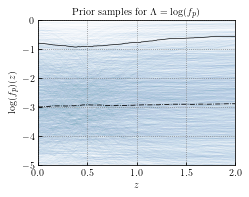

In [6]:
cm = 1/2.54
fig1, ax1 = plt.subplots(figsize=(9*cm, 6.75*cm))
ax1.set_rasterization_zorder(2)
fp_matrix = np.zeros((len(range(samps.log_f_peak.size)), len(zs)))

prior_fp = rand.uniform(-6,0, samps.alpha_ref.size)
prior_high_fp = rand.uniform(-6,0, samps.alpha_ref.size)
prior_width_fp = rand.uniform(-1,1, samps.alpha_ref.size)
prior_middle_fp = rand.uniform(0, 0.8, samps.alpha_ref.size)

for i in range(samps.log_f_peak.size):
    fp_r = sigmoid_no_delta(prior_fp[i],
                               prior_high_fp[i],
                               10.**prior_width_fp[i],
                               prior_middle_fp[i],
                               zs,
                              )
    ax1.plot(zs, fp_r, lw = 0.05, color='#1f78b4', alpha = 0.2, zorder = 1)
    fp_matrix[i, :] = fp_r

fp_median = np.median(fp_matrix, axis = 0)
plt.xlim(0,2)
plt.ylim(-5, 0)
plt.xlabel(r"$z$", fontsize = 10)
plt.ylabel(r"$\log(f_p)(z)$", fontsize = 10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax1.plot(zs, fp_median, "-.", c="k", zorder = 1, lw = 0.8)
ax1.plot(zs,np.quantile(fp_matrix,0.05,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)
ax1.plot(zs,np.quantile(fp_matrix,0.95,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)
only_prior_fp_median = fp_median
only_prior_fp_quantile_5 = np.quantile(fp_matrix,0.05,axis=0)
only_prior_fp_quantile_95 = np.quantile(fp_matrix,0.95,axis=0)
plt.title(r"Prior samples for $\Lambda = \log(f_p)$", fontsize = 10)
plt.savefig("Prior_power_law_trace_fp.pdf", dpi=400, bbox_inches='tight')
plt.show()

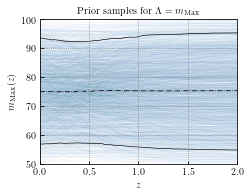

In [7]:
cm = 1/2.54
fig1, ax1 = plt.subplots(figsize=(9*cm, 6.75*cm))
ax1.set_rasterization_zorder(2)
mMax_matrix = np.zeros((len(range(samps.log_f_peak.size)), len(zs)))

prior_mMax = rand.uniform(50,100, samps.alpha_ref.size)
prior_high_mMax = rand.uniform(50,100, samps.alpha_ref.size)
prior_width_mMax = rand.uniform(-1,1, samps.alpha_ref.size)
prior_middle_mMax = rand.uniform(0, 0.8, samps.alpha_ref.size)

for i in range(samps.log_f_peak.size):
    mMax_r = sigmoid_no_delta(prior_mMax[i],
                               prior_high_mMax[i],
                               10.**prior_width_mMax[i],
                               prior_middle_mMax[i],
                               zs,
                              )
    ax1.plot(zs, mMax_r, lw = 0.05, color='#1f78b4', alpha = 0.2, zorder = 1)
    mMax_matrix[i, :] = mMax_r

mMax_median = np.median(mMax_matrix, axis = 0)
plt.xlim(0,2)
plt.ylim(50, 100)
plt.xlabel(r"$z$", fontsize = 10)
plt.ylabel(r"$m_{\rm Max}(z)$", fontsize = 10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax1.plot(zs, mMax_median, "-.", c="k", zorder = 1, lw = 0.8)
ax1.plot(zs,np.quantile(mMax_matrix,0.05,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)
ax1.plot(zs,np.quantile(mMax_matrix,0.95,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)
only_prior_mMax_median = mMax_median
only_prior_mMax_quantile_5 = np.quantile(mMax_matrix,0.05,axis=0)
only_prior_mMax_quantile_95 = np.quantile(mMax_matrix,0.95,axis=0)
plt.title(r"Prior samples for $\Lambda = m_{\rm Max}$", fontsize = 10)
plt.savefig("Prior_power_law_trace_mMax.pdf", dpi=400, bbox_inches='tight')
plt.show()

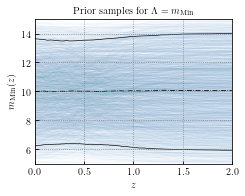

In [8]:
cm = 1/2.54
fig1, ax1 = plt.subplots(figsize=(9*cm, 6.75*cm))
ax1.set_rasterization_zorder(2)
mMin_matrix = np.zeros((len(range(samps.log_f_peak.size)), len(zs)))

prior_mMin = rand.uniform(5,15, samps.alpha_ref.size)
prior_high_mMin = rand.uniform(5,15, samps.alpha_ref.size)
prior_width_mMin = rand.uniform(-1,1, samps.alpha_ref.size)
prior_middle_mMin = rand.uniform(0, 0.8, samps.alpha_ref.size)

for i in range(samps.log_f_peak.size):
    mMin_r = sigmoid_no_delta(prior_mMin[i],
                               prior_high_mMin[i],
                               10.**prior_width_mMin[i],
                               prior_middle_mMin[i],
                               zs,
                              )
    ax1.plot(zs, mMin_r, lw = 0.05, color='#1f78b4', alpha = 0.2, zorder = 1)
    mMin_matrix[i, :] = mMin_r

mMin_median = np.median(mMin_matrix, axis = 0)
plt.xlim(0,2)
plt.ylim(5, 15)
plt.xlabel(r"$z$", fontsize = 10)
plt.ylabel(r"$m_{\rm Min}(z)$", fontsize = 10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax1.plot(zs, mMin_median, "-.", c="k", zorder = 1, lw = 0.8)
ax1.plot(zs,np.quantile(mMin_matrix,0.05,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)
ax1.plot(zs,np.quantile(mMin_matrix,0.95,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)
only_prior_mMin_median = mMin_median
only_prior_mMin_quantile_5 = np.quantile(mMin_matrix,0.05,axis=0)
only_prior_mMin_quantile_95 = np.quantile(mMin_matrix,0.95,axis=0)
plt.title(r"Prior samples for $\Lambda = m_{\rm Min}$", fontsize = 10)
plt.savefig("Prior_power_law_trace_mMin.pdf", dpi=400, bbox_inches='tight')
plt.show()

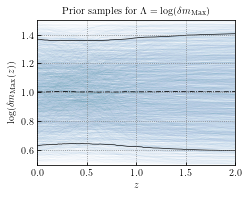

In [9]:
cm = 1/2.54
fig1, ax1 = plt.subplots(figsize=(9*cm, 6.75*cm))
ax1.set_rasterization_zorder(2)
dm_matrix = np.zeros((len(range(samps.log_f_peak.size)), len(zs)))

prior_dm = rand.uniform(0.5, 1.5, samps.alpha_ref.size)
prior_high_dm = rand.uniform(0.5,1.5, samps.alpha_ref.size)
prior_width_dm = rand.uniform(-1,1, samps.alpha_ref.size)
prior_middle_dm = rand.uniform(0, 0.8, samps.alpha_ref.size)

for i in range(samps.log_f_peak.size):
    dm_r = sigmoid_no_delta(prior_dm[i],
                               prior_high_dm[i],
                               10.**prior_width_dm[i],
                               prior_middle_dm[i],
                               zs,
                              )
    ax1.plot(zs, dm_r, lw = 0.05, color='#1f78b4', alpha = 0.2, zorder = 1)
    dm_matrix[i, :] = dm_r

dm_median = np.median(dm_matrix, axis = 0)
plt.xlim(0,2)
plt.ylim(0.5, 1.5)
plt.xlabel(r"$z$", fontsize = 10)
plt.ylabel(r"$\log(\delta m_{\rm Max}(z))$", fontsize = 10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax1.plot(zs, dm_median, "-.", c="k", zorder = 1, lw = 0.8)
ax1.plot(zs,np.quantile(dm_matrix,0.05,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)
ax1.plot(zs,np.quantile(dm_matrix,0.95,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)
only_prior_dm_median = dm_median
only_prior_dm_quantile_5 = np.quantile(dm_matrix,0.05,axis=0)
only_prior_dm_quantile_95 = np.quantile(dm_matrix,0.95,axis=0)
plt.title(r"Prior samples for $\Lambda = \log(\delta m_{\rm Max})$", fontsize = 10)
plt.savefig("Prior_power_law_trace_dm.pdf", dpi=400, bbox_inches='tight')
plt.show()

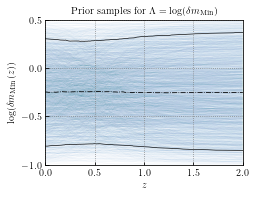

In [10]:
cm = 1/2.54
fig1, ax1 = plt.subplots(figsize=(9*cm, 6.75*cm))
ax1.set_rasterization_zorder(2)
dmMin_matrix = np.zeros((len(range(samps.log_f_peak.size)), len(zs)))

prior_dmMin = rand.uniform(-1, 0.5, samps.alpha_ref.size)
prior_high_dmMin = rand.uniform(-1,0.5, samps.alpha_ref.size)
prior_width_dmMin = rand.uniform(-1,1, samps.alpha_ref.size)
prior_middle_dmMin = rand.uniform(0, 0.8, samps.alpha_ref.size)

for i in range(samps.log_f_peak.size):
    dmMin_r = sigmoid_no_delta(prior_dmMin[i],
                               prior_high_dmMin[i],
                               10.**prior_width_dmMin[i],
                               prior_middle_dmMin[i],
                               zs,
                              )
    ax1.plot(zs, dmMin_r, lw = 0.05, color='#1f78b4', alpha = 0.2, zorder = 1)
    dmMin_matrix[i, :] = dmMin_r

dmMin_median = np.median(dmMin_matrix, axis = 0)
plt.xlim(0,2)
plt.ylim(-1, 0.5)
plt.xlabel(r"$z$", fontsize = 10)
plt.ylabel(r"$\log(\delta m_{\rm Min}(z))$", fontsize = 10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax1.plot(zs, dmMin_median, "-.", c="k", zorder = 1, lw = 0.8)
ax1.plot(zs,np.quantile(dmMin_matrix,0.05,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)
ax1.plot(zs,np.quantile(dmMin_matrix,0.95,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)
only_prior_dmMin_median = dmMin_median
only_prior_dmMin_quantile_5 = np.quantile(dmMin_matrix,0.05,axis=0)
only_prior_dmMin_quantile_95 = np.quantile(dmMin_matrix,0.95,axis=0)
plt.title(r"Prior samples for $\Lambda = \log(\delta m_{\rm Min})$", fontsize = 10)
plt.savefig("Prior_power_law_trace_dmMin.pdf", dpi=400, bbox_inches='tight')
plt.show()

In [28]:
def computing_gaussian_prob(value, mean, std):
    return (1/(std * np.sqrt(2*np.pi))) * np.exp(-(value - mean)**2/(2.*std**2))

def computing_uniform_prob(a, b):
    return 1/(b-a)

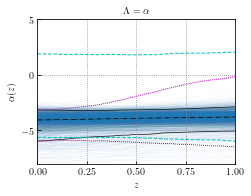

In [13]:
cm = 1/2.54
fig, ax = plt.subplots(figsize=(9*cm, 6.75*cm))
ax.set_rasterization_zorder(2)
alpha_matrix = np.zeros((len(range(samps.alpha_ref.size)), len(zs)))
alpha_matrix_post = np.zeros((len(range(samps.alpha_ref.size)), len(zs)))
low_value_z_matrix = np.zeros(len(samps.alpha_ref.values))
z_ref = 0

for i in range(samps.alpha_ref.size):
    okay = False
    while not okay:
        prior_alpha = rand.normal(-2, 3)
        prior_high_alpha = rand.normal(-2, 3)
        prior_width_alpha = rand.uniform(-1,1)
        prior_width_non_log_alpha = 10.**prior_width_alpha
        prior_middle_alpha = rand.uniform(0, 0.8)
        posterior_value_z_0 = sigmoid_no_delta(samps.alpha_ref.values[i],
                               samps.high_alpha.values[i],
                               10.**samps.log_width_alpha.values[i],
                               samps.middle_z_alpha.values[i],
                               z_ref,
                              )
        intermediate_step = 1 + np.exp(samps.middle_z_alpha.values[i]/samps.width_alpha.values[i])
        value_at_z_0 = samps.alpha_ref.values[i] + (
            (samps.high_alpha.values[i] - samps.alpha_ref.values[i])/(intermediate_step)
        )
        intermediate_step_prior = np.exp(prior_middle_alpha/prior_width_non_log_alpha)
        low_z_value_alpha = (prior_high_alpha - (value_at_z_0*(1 + intermediate_step_prior))) / (-1*intermediate_step_prior)

        prob_low_prior = computing_gaussian_prob(low_z_value_alpha, -2, 3)
        exp_inv = 1 - (1/(1 + np.exp(-(z_ref - prior_middle_alpha)/prior_width_non_log_alpha)))
        C = 1 # 1e4
        rejection_param = prob_low_prior * exp_inv**(-1) / C
    
        rejection_threshold = rand.uniform(0, 1)

        if rejection_threshold <= rejection_param:
            okay = True
    
    alpha_r = sigmoid_no_delta(low_z_value_alpha,
                               prior_high_alpha,
                               10.**prior_width_alpha,
                               prior_middle_alpha,
                               zs,
                              )
    # plt.plot(zs, mu_r, lw = 0.05, color='m', alpha = 0.2, zorder = 1)
    alpha_matrix[i, :] = alpha_r
    
    alpha_r_post = sigmoid_no_delta(samps.alpha_ref.values[i],
                               samps.high_alpha.values[i],
                               10.**samps.log_width_alpha.values[i],
                               samps.middle_z_alpha.values[i],
                               zs,
                              )
    plt.plot(zs, alpha_r_post, lw = 0.05, color='#1f78b4', alpha = 0.2, zorder = 1)
    alpha_matrix_post[i, :] = alpha_r_post

median_alpha = np.median(alpha_matrix, axis = 0)
median_alpha_post = np.median(alpha_matrix_post, axis = 0)
plt.xlim(0,1)
plt.ylim(-8, 5)
plt.xlabel(r"$z$", fontsize = 10)
plt.ylabel(r"$\alpha(z)$", fontsize = 10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.plot(zs, median_alpha_post, "-.", c="k", zorder = 1, lw = 0.8)
plt.plot(zs,np.quantile(alpha_matrix_post,0.05,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)
plt.plot(zs,np.quantile(alpha_matrix_post,0.95,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)
# plt.plot(zs, median_alpha, c="m", zorder = 1, lw = 0.8, linestyle=(0,(1,1)))
plt.plot(zs,np.quantile(alpha_matrix,0.05,axis=0), zorder = 1, color='m', lw=1, alpha=1, linestyle=(0,(1,1)))
plt.plot(zs,np.quantile(alpha_matrix,0.95,axis=0), zorder = 1, color='m', lw=1, alpha=1, linestyle=(0,(1,1)))
# plt.plot(zs, only_prior_alpha_median, zorder = 1, color='c', lw=1, linestyle="dashed")
plt.plot(zs, only_prior_alpha_quantile_5, zorder = 1, color='c', lw=1, linestyle="dashed")
plt.plot(zs, only_prior_alpha_quantile_95, zorder = 1, color='c', lw=1, linestyle="dashed")
# plt.scatter(np.zeros(len(value_at_0_matrix))-0.5, value_at_0_matrix, s=0.01)
# plt.scatter(np.ones(len(value_at_0_matrix_only_post))-1.9, value_at_0_matrix_only_post, s=0.01, c="y")
plt.title(r"$\Lambda = \alpha$", fontsize = 10)
plt.savefig("Prior_random_tuning_to_posterior_at_z_0_alpha_new_prior.png", dpi=500, bbox_inches='tight')
plt.show()

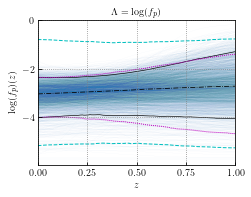

In [12]:
cm = 1/2.54
fig, ax = plt.subplots(figsize=(9*cm, 6.75*cm))
ax.set_rasterization_zorder(2)
fp_matrix = np.zeros((len(range(samps.log_f_peak.size)), len(zs)))
fp_matrix_post = np.zeros((len(range(samps.log_f_peak.size)), len(zs)))
low_value_z_matrix = np.zeros(len(samps.log_f_peak.values))
z_ref = 0

for i in range(samps.log_f_peak.size):
    okay = False
    while not okay:
        prior_fpeak = rand.uniform(-6, 0)
        prior_high_fpeak = rand.uniform(-6, 0)
        prior_width_fpeak = rand.uniform(-1,1)
        prior_width_non_log_fpeak = 10.**prior_width_fpeak
        prior_middle_fpeak = rand.uniform(0, 0.8)
        posterior_value_z_0 = sigmoid_no_delta(samps.log_f_peak.values[i],
                               samps.log_high_f_peak.values[i],
                               10.**samps.log_width_f_peak.values[i],
                               samps.middle_z_f_peak.values[i],
                               0,
                              )

        intermediate_step = 1 + np.exp(samps.middle_z_f_peak.values[i]/samps.width_f_peak.values[i])
        value_at_z_0 = samps.log_f_peak.values[i] + (
            (samps.log_high_f_peak.values[i] - samps.log_f_peak.values[i])/(intermediate_step)
        )
        intermediate_step_prior = np.exp(prior_middle_fpeak/(10**(prior_width_fpeak)))
        low_z_value_fp = (prior_high_fpeak - (value_at_z_0*(1 + intermediate_step_prior))) / (-1*intermediate_step_prior)
    # posterior_value_z_0 - ( prior_high_fpeak - prior_fpeak ) / ( 1 + jnp.exp( prior_middle_fpeak / 10**prior_width_fpeak ) )

        low_value_z_matrix[i] = low_z_value_fp
        prob_low_prior = computing_uniform_prob(-6, 0)
        exp_inv = 1 - (1/(1 + np.exp(-(z_ref - prior_middle_fpeak)/prior_width_non_log_fpeak)))
        C = 1 # 1e4
        rejection_param = prob_low_prior * exp_inv**(-1) / C
    
        rejection_threshold = rand.uniform(0, 1)

        if rejection_threshold <= rejection_param:
            okay = True

    fp_r = sigmoid_no_delta(low_z_value_fp,
                               prior_high_fpeak,
                               10.**prior_width_fpeak,
                               prior_middle_fpeak,
                               zs,
                              )
    # plt.plot(zs, mu_r, lw = 0.05, color='m', alpha = 0.2, zorder = 1)
    fp_matrix[i, :] = fp_r
    
    fp_r_post = sigmoid_no_delta(samps.log_f_peak.values[i],
                               samps.log_high_f_peak.values[i],
                               10.**samps.log_width_f_peak.values[i],
                               samps.middle_z_f_peak.values[i],
                               zs,
                              )
    plt.plot(zs, fp_r_post, lw = 0.05, color='#1f78b4', alpha = 0.2, zorder = 1)
    fp_matrix_post[i, :] = fp_r_post

median_fp = np.median(fp_matrix, axis = 0)
median_fp_post = np.median(fp_matrix_post, axis = 0)
plt.xlim(0,1)
plt.ylim(-5.95, 0)
plt.xlabel(r"$z$", fontsize = 10)
plt.ylabel(r"$\log(f_p)(z)$", fontsize = 10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.plot(zs, median_fp_post, "-.", c="k", zorder = 1, lw = 0.8)
plt.plot(zs,np.quantile(fp_matrix_post,0.05,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)
plt.plot(zs,np.quantile(fp_matrix_post,0.95,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)
# plt.plot(zs, median_fp, c="m", zorder = 1, lw = 0.8, linestyle=(0,(1,10)))
plt.plot(zs,np.quantile(fp_matrix,0.05,axis=0), zorder = 1, color='m', lw=1, alpha=1, linestyle=(0,(1,1)))
plt.plot(zs,np.quantile(fp_matrix,0.95,axis=0), zorder = 1, color='m', lw=1, alpha=1, linestyle=(0,(1,1)))
# plt.plot(zs, only_prior_fp_median, zorder = 1, color='c', lw=1, linestyle="dashed")
plt.plot(zs, only_prior_fp_quantile_5, zorder = 1, color='c', lw=1, linestyle="dashed")
plt.plot(zs, only_prior_fp_quantile_95, zorder = 1, color='c', lw=1, linestyle="dashed")
# plt.scatter(np.zeros(len(value_at_0_matrix))-0.5, value_at_0_matrix, s=0.01)
# plt.scatter(np.ones(len(value_at_0_matrix_only_post))-1.9, value_at_0_matrix_only_post, s=0.01, c="y")
plt.title(r"$\Lambda = \log(f_p)$", fontsize = 10)
plt.savefig("Prior_power_law_random_tuning_to_posterior_at_z_0_fp_new_prior.png", dpi=500, bbox_inches='tight')
plt.show()

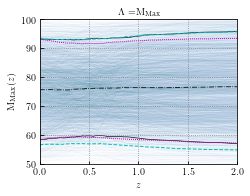

In [37]:
cm = 1/2.54
fig, ax = plt.subplots(figsize=(9*cm, 6.75*cm))
ax.set_rasterization_zorder(2)
mMax_matrix = np.zeros((len(range(samps.log_f_peak.size)), len(zs)))
mMax_matrix_post = np.zeros((len(range(samps.log_f_peak.size)), len(zs)))
low_value_z_matrix = np.zeros(len(samps.log_f_peak.values))

for i in range(samps.log_f_peak.size):
    okay = False
    while not okay:
        prior_mMax = rand.uniform(50,100)
        prior_high_mMax = rand.uniform(50,100)
        prior_width_mMax = rand.uniform(-1,1)
        prior_middle_mMax = rand.uniform(0, 0.8)
        posterior_value_z_0 = sigmoid_no_delta(samps.mMax.values[i],
                               samps.high_mMax.values[i],
                               10.**samps.log_width_mMax.values[i],
                               samps.middle_z_mMax.values[i],
                               0,
                              )

        intermediate_step = 1 + np.exp(samps.middle_z_mMax.values[i]/samps.width_mMax.values[i])
        value_at_z_0 = samps.mMax.values[i] + (
            (samps.high_mMax.values[i] - samps.mMax.values[i])/(intermediate_step)
        )
        intermediate_step_prior = np.exp(prior_middle_mMax/(10**(prior_width_mMax)))
        low_z_value_mMax = (prior_high_mMax - (value_at_z_0*(1 + intermediate_step_prior))) / (-1*intermediate_step_prior)
    # posterior_value_z_0 - ( prior_high_fpeak - prior_fpeak ) / ( 1 + jnp.exp( prior_middle_fpeak / 10**prior_width_fpeak ) )

        prob_low_prior = computing_uniform_prob(50, 100)
        exp_inv = 1 - (1/(1 + np.exp(-(z_ref - prior_middle_mMax)/10.**prior_width_mMax)))
        C = 1 # 1e4
        rejection_param = prob_low_prior * exp_inv**(-1) / C
    
        rejection_threshold = rand.uniform(0, 1)

        if rejection_threshold <= rejection_param:
            okay = True

    low_value_z_matrix[i] = low_z_value_mMax
    mMax_r = sigmoid_no_delta(low_z_value_mMax,
                               prior_high_mMax,
                               10.**prior_width_mMax,
                               prior_middle_mMax,
                               zs,
                              )
    # plt.plot(zs, mu_r, lw = 0.05, color='m', alpha = 0.2, zorder = 1)
    mMax_matrix[i, :] = mMax_r
    
    mMax_r_post = sigmoid_no_delta(samps.mMax.values[i],
                               samps.high_mMax.values[i],
                               10.**samps.log_width_mMax.values[i],
                               samps.middle_z_mMax.values[i],
                               zs,
                              )
    plt.plot(zs, mMax_r_post, lw = 0.05, color='#1f78b4', alpha = 0.2, zorder = 1)
    mMax_matrix_post[i, :] = mMax_r_post

median_mMax = np.median(mMax_matrix, axis = 0)
median_mMax_post = np.median(mMax_matrix_post, axis = 0)
plt.xlim(0,2)
plt.ylim(50, 100)
plt.xlabel(r"$z$", fontsize = 10)
plt.ylabel(r"M$_{\rm Max}(z)$", fontsize = 10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.plot(zs, median_mMax_post, "-.", c="k", zorder = 1, lw = 0.8)
plt.plot(zs,np.quantile(mMax_matrix_post,0.05,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)
plt.plot(zs,np.quantile(mMax_matrix_post,0.95,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)
# plt.plot(zs, median_mMax, c="m", zorder = 1, lw = 0.8, linestyle=(0,(1,10)))
plt.plot(zs,np.quantile(mMax_matrix,0.05,axis=0), zorder = 1, color='m', lw=1, alpha=1, linestyle=(0,(1,1)))
plt.plot(zs,np.quantile(mMax_matrix,0.95,axis=0), zorder = 1, color='m', lw=1, alpha=1, linestyle=(0,(1,1)))
# plt.plot(zs, only_prior_mMax_median, zorder = 1, color='c', lw=1, linestyle="dashed")
plt.plot(zs, only_prior_mMax_quantile_5, zorder = 1, color='c', lw=1, linestyle="dashed")
plt.plot(zs, only_prior_mMax_quantile_95, zorder = 1, color='c', lw=1, linestyle="dashed")
# plt.scatter(np.zeros(len(value_at_0_matrix))-0.5, value_at_0_matrix, s=0.01)
# plt.scatter(np.ones(len(value_at_0_matrix_only_post))-1.9, value_at_0_matrix_only_post, s=0.01, c="y")
plt.title(r"$\Lambda = $M$_{\rm Max}$", fontsize = 10)
plt.savefig("Prior_power_law_random_tuning_to_posterior_at_z_0_mMax.png", dpi=500, bbox_inches='tight')
plt.show()

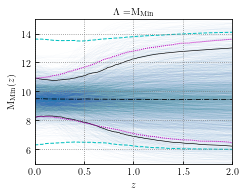

In [38]:
cm = 1/2.54
fig, ax = plt.subplots(figsize=(9*cm, 6.75*cm))
ax.set_rasterization_zorder(2)
mMin_matrix = np.zeros((len(range(samps.log_f_peak.size)), len(zs)))
mMin_matrix_post = np.zeros((len(range(samps.log_f_peak.size)), len(zs)))
low_value_z_matrix = np.zeros(len(samps.log_f_peak.values))
for i in range(samps.log_f_peak.size):
    okay = False
    while not okay:
        prior_mMin = rand.uniform(5,15)
        prior_high_mMin = rand.uniform(5,15)
        prior_width_mMin = rand.uniform(-1,1)
        prior_middle_mMin = rand.uniform(0, 0.8)
        posterior_value_z_0 = sigmoid_no_delta(samps.mMin.values[i],
                               samps.high_mMin.values[i],
                               10.**samps.log_width_mMin.values[i],
                               samps.middle_z_mMin.values[i],
                               0,
                              )

        intermediate_step = 1 + np.exp(samps.middle_z_mMin.values[i]/samps.width_mMin.values[i])
        value_at_z_0 = samps.mMin.values[i] + (
            (samps.high_mMin.values[i] - samps.mMin.values[i])/(intermediate_step)
        )
        intermediate_step_prior = np.exp(prior_middle_mMin/(10**(prior_width_mMin)))
        low_z_value_mMin = (prior_high_mMin - (value_at_z_0*(1 + intermediate_step_prior))) / (-1*intermediate_step_prior)
        
        prob_low_prior = computing_uniform_prob(5, 15)
        exp_inv = 1 - (1/(1 + np.exp(-(z_ref - prior_middle_mMin)/10.**prior_width_mMin)))
        C = 1 # 1e4
        rejection_param = prob_low_prior * exp_inv**(-1) / C
    
        rejection_threshold = rand.uniform(0, 1)

        if rejection_threshold <= rejection_param:
            okay = True

    mMin_r = sigmoid_no_delta(low_z_value_mMin,
                               prior_high_mMin,
                               10.**prior_width_mMin,
                               prior_middle_mMin,
                               zs,
                              )
    # plt.plot(zs, mu_r, lw = 0.05, color='m', alpha = 0.2, zorder = 1)
    mMin_matrix[i, :] = mMin_r
    
    mMin_r_post = sigmoid_no_delta(samps.mMin.values[i],
                               samps.high_mMin.values[i],
                               10.**samps.log_width_mMin.values[i],
                               samps.middle_z_mMin.values[i],
                               zs,
                              )
    plt.plot(zs, mMin_r_post, lw = 0.05, color='#1f78b4', alpha = 0.2, zorder = 1)
    mMin_matrix_post[i, :] = mMin_r_post

median_mMin = np.median(mMin_matrix, axis = 0)
median_mMin_post = np.median(mMin_matrix_post, axis = 0)
plt.xlim(0,2)
plt.ylim(5, 15)
plt.xlabel(r"$z$", fontsize = 10)
plt.ylabel(r"M$_{\rm Min}(z)$", fontsize = 10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.plot(zs, median_mMin_post, "-.", c="k", zorder = 1, lw = 0.8)
plt.plot(zs,np.quantile(mMin_matrix_post,0.05,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)
plt.plot(zs,np.quantile(mMin_matrix_post,0.95,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)
# plt.plot(zs, median_mMin, c="m", zorder = 1, lw = 0.8, linestyle=(0,(1,10)))
plt.plot(zs,np.quantile(mMin_matrix,0.05,axis=0), zorder = 1, color='m', lw=1, alpha=1, linestyle=(0,(1,1)))
plt.plot(zs,np.quantile(mMin_matrix,0.95,axis=0), zorder = 1, color='m', lw=1, alpha=1, linestyle=(0,(1,1)))
# plt.plot(zs, only_prior_mMin_median, zorder = 1, color='c', lw=1, linestyle="dashed")
plt.plot(zs, only_prior_mMin_quantile_5, zorder = 1, color='c', lw=1, linestyle="dashed")
plt.plot(zs, only_prior_mMin_quantile_95, zorder = 1, color='c', lw=1, linestyle="dashed")
# plt.scatter(np.zeros(len(value_at_0_matrix))-0.5, value_at_0_matrix, s=0.01)
# plt.scatter(np.ones(len(value_at_0_matrix_only_post))-1.9, value_at_0_matrix_only_post, s=0.01, c="y")
plt.title(r"$\Lambda = $M$_{\rm Min}$", fontsize = 10)
plt.savefig("Prior_power_law_random_tuning_to_posterior_at_z_0_mMin.png", dpi=500, bbox_inches='tight')
plt.show()

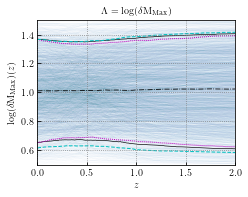

In [35]:
cm = 1/2.54
fig, ax = plt.subplots(figsize=(9*cm, 6.75*cm))
ax.set_rasterization_zorder(2)
dm_matrix = np.zeros((len(range(samps.log_f_peak.size)), len(zs)))
dm_matrix_post = np.zeros((len(range(samps.log_f_peak.size)), len(zs)))
low_value_z_matrix = np.zeros(len(samps.log_f_peak.values))
for i in range(samps.log_f_peak.size):
    okay = False
    while not okay:
        prior_log_dm = rand.uniform(0.5, 1.5)
        prior_log_high_dmMax = rand.uniform(0.5,1.5)
        prior_width_dm = rand.uniform(-1,1)
        prior_middle_dm = rand.uniform(0, 0.8)
        posterior_value_z_0 = sigmoid_no_delta(samps.log_dmMax.values[i],
                               samps.log_high_dmMax.values[i],
                               10.**samps.log_width_dmMax.values[i],
                               samps.middle_z_dmMax.values[i],
                               0,
                              )

        intermediate_step = 1 + np.exp(samps.middle_z_dmMax.values[i]/samps.width_dmMax.values[i])
        value_at_z_0 = samps.log_dmMax.values[i] + (
            (samps.log_high_dmMax.values[i] - samps.log_dmMax.values[i])/(intermediate_step)
        )
        intermediate_step_prior = np.exp(prior_middle_dm/(10**(prior_width_dm)))
        low_z_value_dm = (prior_log_high_dmMax - (value_at_z_0*(1 + intermediate_step_prior))) / (-1*intermediate_step_prior)
                
        prob_low_prior = computing_uniform_prob(0.5, 1.5)
        exp_inv = 1 - (1/(1 + np.exp(-(z_ref - prior_middle_dm)/10.**prior_width_dm)))
        C = 1 # 1e4
        rejection_param = prob_low_prior * exp_inv**(-1) / C
    
        rejection_threshold = rand.uniform(0, 1)

        if rejection_threshold <= rejection_param:
            okay = True

    dm_r = sigmoid_no_delta(low_z_value_dm,
                               prior_log_high_dmMax,
                               10.**prior_width_dm,
                               prior_middle_dm,
                               zs,
                              )
    # plt.plot(zs, mu_r, lw = 0.05, color='m', alpha = 0.2, zorder = 1)
    dm_matrix[i, :] = dm_r
    
    dm_r_post = sigmoid_no_delta(samps.log_dmMax.values[i],
                               samps.log_high_dmMax.values[i],
                               10.**samps.log_width_dmMax.values[i],
                               samps.middle_z_dmMax.values[i],
                               zs,
                              )
    plt.plot(zs, dm_r_post, lw = 0.05, color='#1f78b4', alpha = 0.2, zorder = 1)
    dm_matrix_post[i, :] = dm_r_post

median_dm = np.median(dm_matrix, axis = 0)
median_dm_post = np.median(dm_matrix_post, axis = 0)
plt.xlim(0,2)
plt.ylim(0.5, 1.5)
plt.xlabel(r"$z$", fontsize = 10)
plt.ylabel(r"$\log(\delta $M$_{\rm Max})(z)$", fontsize = 10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.plot(zs, median_dm_post, "-.", c="k", zorder = 1, lw = 0.8)
plt.plot(zs,np.quantile(dm_matrix_post,0.05,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)
plt.plot(zs,np.quantile(dm_matrix_post,0.95,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)
# plt.plot(zs, median_dm, c="m", zorder = 1, lw = 0.8, linestyle=(0,(1,10)))
plt.plot(zs,np.quantile(dm_matrix,0.05,axis=0), zorder = 1, color='m', lw=1, alpha=1, linestyle=(0,(1,1)))
plt.plot(zs,np.quantile(dm_matrix,0.95,axis=0), zorder = 1, color='m', lw=1, alpha=1, linestyle=(0,(1,1)))
# plt.plot(zs, only_prior_dm_median, zorder = 1, color='c', lw=1, linestyle="dashed")
plt.plot(zs, only_prior_dm_quantile_5, zorder = 1, color='c', lw=1, linestyle="dashed")
plt.plot(zs, only_prior_dm_quantile_95, zorder = 1, color='c', lw=1, linestyle="dashed")
# plt.scatter(np.zeros(len(value_at_0_matrix))-0.5, value_at_0_matrix, s=0.01)
# plt.scatter(np.ones(len(value_at_0_matrix_only_post))-1.9, value_at_0_matrix_only_post, s=0.01, c="y")
plt.title(r"$\Lambda = \log(\delta $M$_{\rm Max})$", fontsize = 10)
plt.savefig("Prior_power_law_random_tuning_to_posterior_at_z_0_dmMax.png", dpi=500, bbox_inches='tight')
plt.show()

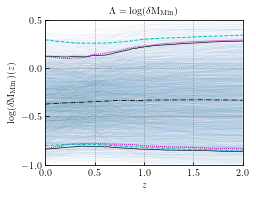

In [36]:
cm = 1/2.54
fig, ax = plt.subplots(figsize=(9*cm, 6.75*cm))
ax.set_rasterization_zorder(2)
dmMin_matrix = np.zeros((len(range(samps.log_f_peak.size)), len(zs)))
dmMin_matrix_post = np.zeros((len(range(samps.log_f_peak.size)), len(zs)))
low_value_z_matrix = np.zeros(len(samps.log_f_peak.values))
for i in range(samps.log_f_peak.size):
    okay = False
    while not okay:
        prior_log_dmMin = rand.uniform(-1, 0.5)
        prior_log_high_dmMin = rand.uniform(-1,0.5)
        prior_width_dmMin = rand.uniform(-1,1)
        prior_middle_dmMin = rand.uniform(0, 0.8)
        posterior_value_z_0 = sigmoid_no_delta(samps.log_dmMin.values[i],
                               samps.log_high_dmMin.values[i],
                               10.**samps.log_width_dmMin.values[i],
                               samps.middle_z_dmMin.values[i],
                               0,
                              )

        intermediate_step = 1 + np.exp(samps.middle_z_dmMin.values[i]/samps.width_dmMin.values[i])
        value_at_z_0 = samps.log_dmMin.values[i] + (
            (samps.log_high_dmMin.values[i] - samps.log_dmMin.values[i])/(intermediate_step)
        )
        intermediate_step_prior = np.exp(prior_middle_dmMin/(10**(prior_width_dmMin)))
        low_z_value_dmMin = (prior_log_high_dmMin - (value_at_z_0*(1 + intermediate_step_prior))) / (-1*intermediate_step_prior)
        
        prob_low_prior = computing_uniform_prob(-1, 0.5)
        exp_inv = 1 - (1/(1 + np.exp(-(z_ref - prior_middle_dmMin)/10.**prior_width_dmMin)))
        C = 1 # 1e4
        rejection_param = prob_low_prior * exp_inv**(-1) / C
    
        rejection_threshold = rand.uniform(0, 1)

        if rejection_threshold <= rejection_param:
            okay = True

    dmMin_r = sigmoid_no_delta(low_z_value_dmMin,
                               prior_log_high_dmMin,
                               10.**prior_width_dmMin,
                               prior_middle_dmMin,
                               zs,
                              )
    # plt.plot(zs, mu_r, lw = 0.05, color='m', alpha = 0.2, zorder = 1)
    dmMin_matrix[i, :] = dmMin_r
    
    dmMin_r_post = sigmoid_no_delta(samps.log_dmMin.values[i],
                               samps.log_high_dmMin.values[i],
                               10.**samps.log_width_dmMin.values[i],
                               samps.middle_z_dmMin.values[i],
                               zs,
                              )
    plt.plot(zs, dmMin_r_post, lw = 0.05, color='#1f78b4', alpha = 0.2, zorder = 1)
    dmMin_matrix_post[i, :] = dmMin_r_post

median_dmMin = np.median(dmMin_matrix, axis = 0)
median_dmMin_post = np.median(dmMin_matrix_post, axis = 0)
plt.xlim(0,2)
plt.ylim(-1, 0.5)
plt.xlabel(r"$z$", fontsize = 10)
plt.ylabel(r"$\log(\delta $M$_{\rm Min})(z)$", fontsize = 10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.plot(zs, median_dmMin_post, "-.", c="k", zorder = 1, lw = 0.8)
plt.plot(zs,np.quantile(dmMin_matrix_post,0.05,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)
plt.plot(zs,np.quantile(dmMin_matrix_post,0.95,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)
# plt.plot(zs, median_dmMin, c="m", zorder = 1, lw = 0.8, linestyle=(0,(1,10)))
plt.plot(zs,np.quantile(dmMin_matrix,0.05,axis=0), zorder = 1, color='m', lw=1, alpha=1, linestyle=(0,(1,1)))
plt.plot(zs,np.quantile(dmMin_matrix,0.95,axis=0), zorder = 1, color='m', lw=1, alpha=1, linestyle=(0,(1,1)))
# plt.plot(zs, only_prior_dmMin_median, zorder = 1, color='c', lw=1, linestyle="dashed")
plt.plot(zs, only_prior_dmMin_quantile_5, zorder = 1, color='c', lw=1, linestyle="dashed")
plt.plot(zs, only_prior_dmMin_quantile_95, zorder = 1, color='c', lw=1, linestyle="dashed")
# plt.scatter(np.zeros(len(value_at_0_matrix))-0.5, value_at_0_matrix, s=0.01)
# plt.scatter(np.ones(len(value_at_0_matrix_only_post))-1.9, value_at_0_matrix_only_post, s=0.01, c="y")
plt.title(r"$\Lambda = \log(\delta $M$_{\rm Min})$", fontsize = 10)
plt.savefig("Prior_power_law_random_tuning_to_posterior_at_z_0_dmMin.png", dpi=500, bbox_inches='tight')
plt.show()

Klopt de formule voor een sigmoid met high en low? Bekijk het eens. -> Inderdaad de formule was incorrect, verander die zoals in traces_peak.

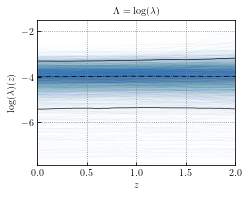

In [10]:
cm = 1/2.54
fig, ax = plt.subplots(figsize=(9*cm, 6.75*cm))
ax.set_rasterization_zorder(2)
kappa_matrix = np.zeros((len(range(samps.alpha_ref.size)), len(zs)))
for i in range(samps.alpha_ref.size):
    kappa_r = sigmoid(samps.alpha_ref.values[i],
                               samps.delta_alpha.values[i],
                               10.**samps.log_width_alpha.values[i],
                               samps.middle_z_alpha.values[i],
                               zs,
                              )
    plt.plot(zs, kappa_r, lw = 0.05, color='#1f78b4', alpha = 0.2, zorder = 1)
    kappa_matrix[i, :] = kappa_r

median_kappa = np.median(kappa_matrix, axis = 0)
plt.xlim(0,2)
plt.ylim(-7.9, -1.5)
plt.xlabel(r"$z$", fontsize = 10)
plt.ylabel(r"$\log(\lambda)(z)$", fontsize = 10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.plot(zs, median_kappa, "-.", c="k", zorder = 1, lw = 0.8)
plt.plot(zs,np.quantile(kappa_matrix,0.05,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)
plt.plot(zs,np.quantile(kappa_matrix,0.95,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)
plt.title(r"$\Lambda = \log(\lambda)$", fontsize = 10)
plt.savefig("Trace_lambda_power_law_z_0_to_2.pdf", dpi = 400, bbox_inches = "tight")
plt.show()

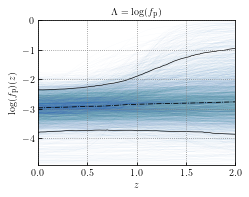

In [11]:
cm = 1/2.54
fig, ax = plt.subplots(figsize=(9*cm, 6.75*cm))
ax.set_rasterization_zorder(2)
fpeak_matrix = np.zeros((len(range(samps.log_f_peak.size)), len(zs)))
for i in range(samps.log_f_peak.size):
    f_peak_r = sigmoid_no_delta(samps.log_f_peak.values[i],
                               samps.log_high_f_peak.values[i],
                               10.**samps.log_width_f_peak.values[i],
                               samps.middle_z_f_peak.values[i],
                               zs,
                              )
    plt.plot(zs, f_peak_r, lw = 0.05, color='#1f78b4', alpha = 0.2, zorder = 0)
    fpeak_matrix[i, :] = f_peak_r

median_fpeak = np.median(fpeak_matrix, axis = 0)
plt.xlim(0,2)
plt.ylim(-4.9, 0)
plt.xlabel(r"$z$", fontsize = 10)
plt.ylabel(r"$\log(f_{\rm p})(z)$", fontsize = 10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.plot(zs, median_fpeak, "-.", c="k", zorder = 1, lw = 0.8)
plt.plot(zs,np.quantile(fpeak_matrix,0.05,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)
plt.plot(zs,np.quantile(fpeak_matrix,0.95,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)
plt.title(r"$\Lambda = \log(f_{\rm p})$", fontsize = 10)
plt.savefig("Trace_fp_power_law_z_0_to_2.pdf", dpi = 400, bbox_inches = "tight")
plt.show()

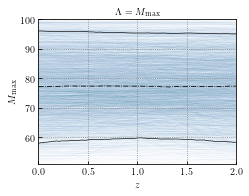

In [9]:
cm = 1/2.54
fig, ax = plt.subplots(figsize=(9*cm, 6.75*cm))
ax.set_rasterization_zorder(2)
mMax_matrix = np.zeros((len(range(samps.alpha_ref.size)), len(zs)))
for i in range(samps.mMax.size):
    mMax_r = sigmoid_no_delta(samps.mMax.values[i],
                               samps.high_mMax.values[i],
                               10.**samps.log_width_mMax.values[i],
                               samps.middle_z_mMax.values[i],
                               zs,
                              )
    plt.plot(zs, mMax_r, lw = 0.05, color='#1f78b4', alpha = 0.2, zorder = 1)
    mMax_matrix[i, :] = mMax_r

median_mMax = np.median(mMax_matrix, axis = 0)
plt.xlim(0,2)
plt.ylim(51, 100)
plt.xlabel(r"$z$", fontsize = 10)
plt.ylabel(r"$M_{\rm max}$", fontsize = 10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.plot(zs, median_mMax, "-.", c="k", zorder = 1, lw = 0.8)
plt.plot(zs,np.quantile(mMax_matrix,0.05,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)
plt.plot(zs,np.quantile(mMax_matrix,0.95,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)
plt.title(r"$\Lambda = M_{\rm max}$", fontsize = 10)
plt.savefig("Trace_mMax_power_law_z_0_to_2.pdf", dpi = 400, bbox_inches = "tight")
plt.show()

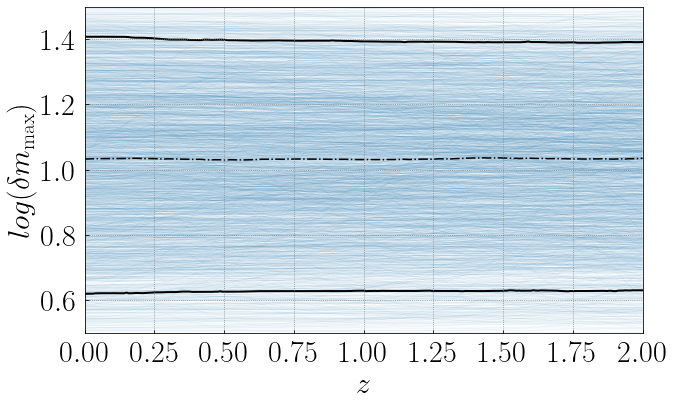

In [18]:
fig,ax = plt.subplots(figsize=(10,6))
ax.set_rasterization_zorder(2)
dmMax_matrix = np.zeros((len(range(samps.log_f_peak.size)), len(zs)))
for i in range(samps.log_dmMax.size):
    f_peak_r = sigmoid_no_delta(samps.log_dmMax.values[i],
                               samps.log_high_dmMax.values[i],
                               10.**samps.log_width_dm.values[i],
                               samps.middle_z_dm.values[i],
                               zs,
                              )
    plt.plot(zs, f_peak_r, lw = 0.15, color='#1f78b4', alpha = 0.2, zorder = 0)
    dmMax_matrix[i, :] = f_peak_r

median_dmMax = np.median(dmMax_matrix, axis = 0)
plt.xlim(0,2)
plt.ylim(0.5, 1.5)
ax.set_xlabel(r"$z$", fontsize = 30)
ax.set_ylabel(r"$log(\delta m_{\rm max})$", fontsize = 30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.plot(zs, median_dmMax, "-.", c="k", zorder = 1)
plt.plot(zs,np.quantile(dmMax_matrix,0.05,axis=0), zorder = 1, color='k', lw=2, alpha=1)
plt.plot(zs,np.quantile(dmMax_matrix,0.95,axis=0), zorder = 1, color='k', lw=2, alpha=1)
plt.savefig("Trace_dmMax_power_law_z_0_to_2.pdf", dpi = 400, bbox_inches = "tight")
plt.show()

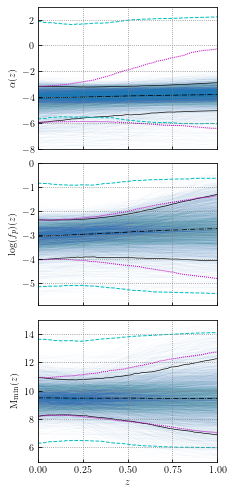

In [42]:
cm = 1/2.54
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(8.75*cm, 3*5.9*cm))
zs = np.linspace(0,1,500)

ax1.set_rasterization_zorder(2)
alpha_matrix = np.zeros((len(range(samps.alpha_ref.size)), len(zs)))
alpha_matrix_post = np.zeros((len(range(samps.alpha_ref.size)), len(zs)))
low_value_z_matrix = np.zeros(len(samps.alpha_ref.values))
for i in range(samps.alpha_ref.size):
    okay = False
    while not okay:
        prior_alpha = rand.normal(-2, 3)
        prior_high_alpha = rand.normal(-2, 3)
        prior_width_alpha = rand.uniform(-1,1)
        prior_width_non_log_alpha = 10.**prior_width_alpha
        prior_middle_alpha = rand.uniform(0, 0.8)
        posterior_value_z_0 = sigmoid_no_delta(samps.alpha_ref.values[i],
                               samps.high_alpha.values[i],
                               10.**samps.log_width_alpha.values[i],
                               samps.middle_z_alpha.values[i],
                               z_ref,
                              )
        intermediate_step = 1 + np.exp(samps.middle_z_alpha.values[i]/samps.width_alpha.values[i])
        value_at_z_0 = samps.alpha_ref.values[i] + (
            (samps.high_alpha.values[i] - samps.alpha_ref.values[i])/(intermediate_step)
        )
        intermediate_step_prior = np.exp(prior_middle_alpha/prior_width_non_log_alpha)
        low_z_value_alpha = (prior_high_alpha - (value_at_z_0*(1 + intermediate_step_prior))) / (-1*intermediate_step_prior)

        prob_low_prior = computing_gaussian_prob(low_z_value_alpha, -2, 3)
        exp_inv = 1 - (1/(1 + np.exp(-(z_ref - prior_middle_alpha)/prior_width_non_log_alpha)))
        C = 1 # 1e4
        rejection_param = prob_low_prior * exp_inv**(-1) / C
    
        rejection_threshold = rand.uniform(0, 1)

        if rejection_threshold <= rejection_param:
            okay = True

    alpha_r = sigmoid_no_delta(low_z_value_alpha,
                               prior_high_alpha,
                               10.**prior_width_alpha,
                               prior_middle_alpha,
                               zs,
                              )
    # plt.plot(zs, mu_r, lw = 0.05, color='m', alpha = 0.2, zorder = 1)
    alpha_matrix[i, :] = alpha_r
    
    alpha_r_post = sigmoid_no_delta(samps.alpha_ref.values[i],
                               samps.high_alpha.values[i],
                               10.**samps.log_width_alpha.values[i],
                               samps.middle_z_alpha.values[i],
                               zs,
                              )
    ax1.plot(zs, alpha_r_post, lw = 0.05, color='#1f78b4', alpha = 0.2, zorder = 1)
    alpha_matrix_post[i, :] = alpha_r_post

median_alpha = np.median(alpha_matrix, axis = 0)
median_alpha_post = np.median(alpha_matrix_post, axis = 0)
ax1.set_ylim(-8,3)
ax1.set_ylabel(r"$\alpha(z)$", fontsize = 10)
ax1.tick_params(axis='y', labelsize=10)
ax1.plot(zs, median_alpha_post, "-.", c="k", zorder = 1, lw = 0.8)
ax1.plot(zs,np.quantile(alpha_matrix_post,0.05,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)
ax1.plot(zs,np.quantile(alpha_matrix_post,0.95,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)
# ax1.plot(zs, median_alpha, c="m", zorder = 1, lw = 0.8, linestyle=(0,(1,1)))
ax1.plot(zs,np.quantile(alpha_matrix,0.05,axis=0), zorder = 1, color='m', lw=1, alpha=1, linestyle=(0,(1,1)))
ax1.plot(zs,np.quantile(alpha_matrix,0.95,axis=0), zorder = 1, color='m', lw=1, alpha=1, linestyle=(0,(1,1)))
# ax1.plot(zs, only_prior_alpha_median, zorder = 1, color='c', lw=1, linestyle="dashed")
ax1.plot(zs, only_prior_alpha_quantile_5, zorder = 1, color='c', lw=1, linestyle="dashed")
ax1.plot(zs, only_prior_alpha_quantile_95, zorder = 1, color='c', lw=1, linestyle="dashed")

ax2.set_rasterization_zorder(2)
fp_matrix = np.zeros((len(range(samps.log_f_peak.size)), len(zs)))
fp_matrix_post = np.zeros((len(range(samps.log_f_peak.size)), len(zs)))
low_value_z_matrix = np.zeros(len(samps.log_f_peak.values))
for i in range(samps.log_f_peak.size):
    okay = False
    while not okay:
        prior_fpeak = rand.uniform(-6, 0)
        prior_high_fpeak = rand.uniform(-6, 0)
        prior_width_fpeak = rand.uniform(-1,1)
        prior_width_non_log_fpeak = 10.**prior_width_fpeak
        prior_middle_fpeak = rand.uniform(0, 0.8)
        posterior_value_z_0 = sigmoid_no_delta(samps.log_f_peak.values[i],
                               samps.log_high_f_peak.values[i],
                               10.**samps.log_width_f_peak.values[i],
                               samps.middle_z_f_peak.values[i],
                               0,
                              )

        intermediate_step = 1 + np.exp(samps.middle_z_f_peak.values[i]/samps.width_f_peak.values[i])
        value_at_z_0 = samps.log_f_peak.values[i] + (
            (samps.log_high_f_peak.values[i] - samps.log_f_peak.values[i])/(intermediate_step)
        )
        intermediate_step_prior = np.exp(prior_middle_fpeak/(10**(prior_width_fpeak)))
        low_z_value_fp = (prior_high_fpeak - (value_at_z_0*(1 + intermediate_step_prior))) / (-1*intermediate_step_prior)
    # posterior_value_z_0 - ( prior_high_fpeak - prior_fpeak ) / ( 1 + jnp.exp( prior_middle_fpeak / 10**prior_width_fpeak ) )

        low_value_z_matrix[i] = low_z_value_fp
        prob_low_prior = computing_uniform_prob(-6, 0)
        exp_inv = 1 - (1/(1 + np.exp(-(z_ref - prior_middle_fpeak)/prior_width_non_log_fpeak)))
        C = 1 # 1e4
        rejection_param = prob_low_prior * exp_inv**(-1) / C
    
        rejection_threshold = rand.uniform(0, 1)

        if rejection_threshold <= rejection_param:
            okay = True

    fp_r = sigmoid_no_delta(low_z_value_fp,
                               prior_high_fpeak,
                               10.**prior_width_fpeak,
                               prior_middle_fpeak,
                               zs,
                              )
    # plt.plot(zs, mu_r, lw = 0.05, color='m', alpha = 0.2, zorder = 1)
    fp_matrix[i, :] = fp_r
    
    fp_r_post = sigmoid_no_delta(samps.log_f_peak.values[i],
                               samps.log_high_f_peak.values[i],
                               10.**samps.log_width_f_peak.values[i],
                               samps.middle_z_f_peak.values[i],
                               zs,
                              )
    ax2.plot(zs, fp_r_post, lw = 0.05, color='#1f78b4', alpha = 0.2, zorder = 1)
    fp_matrix_post[i, :] = fp_r_post

median_fp = np.median(fp_matrix, axis = 0)
median_fp_post = np.median(fp_matrix_post, axis = 0)
ax2.set_ylim(-5.9, 0)
ax2.set_ylabel(r"$\log(f_p)(z)$", fontsize = 10)
ax2.tick_params(axis='y', labelsize=10)
ax2.plot(zs, median_fp_post, "-.", c="k", zorder = 1, lw = 0.8)
ax2.plot(zs,np.quantile(fp_matrix_post,0.05,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)
ax2.plot(zs,np.quantile(fp_matrix_post,0.95,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)
# ax2.plot(zs, median_fp, c="m", zorder = 1, lw = 0.8, linestyle=(0,(1,1)))
ax2.plot(zs,np.quantile(fp_matrix,0.05,axis=0), zorder = 1, color='m', lw=1, alpha=1, linestyle=(0,(1,1)))
ax2.plot(zs,np.quantile(fp_matrix,0.95,axis=0), zorder = 1, color='m', lw=1, alpha=1, linestyle=(0,(1,1)))
# ax2.plot(zs, only_prior_fp_median, zorder = 1, color='c', lw=1, linestyle="dashed")
ax2.plot(zs, only_prior_fp_quantile_5, zorder = 1, color='c', lw=1, linestyle="dashed")
ax2.plot(zs, only_prior_fp_quantile_95, zorder = 1, color='c', lw=1, linestyle="dashed")


ax3.set_rasterization_zorder(2)
mMin_matrix = np.zeros((len(range(samps.log_f_peak.size)), len(zs)))
mMin_matrix_post = np.zeros((len(range(samps.log_f_peak.size)), len(zs)))
low_value_z_matrix = np.zeros(len(samps.log_f_peak.values))
for i in range(samps.log_f_peak.size):
    okay = False
    while not okay:
        prior_mMin = rand.uniform(5,15)
        prior_high_mMin = rand.uniform(5,15)
        prior_width_mMin = rand.uniform(-1,1)
        prior_middle_mMin = rand.uniform(0, 0.8)
        posterior_value_z_0 = sigmoid_no_delta(samps.mMin.values[i],
                               samps.high_mMin.values[i],
                               10.**samps.log_width_mMin.values[i],
                               samps.middle_z_mMin.values[i],
                               0,
                              )

        intermediate_step = 1 + np.exp(samps.middle_z_mMin.values[i]/samps.width_mMin.values[i])
        value_at_z_0 = samps.mMin.values[i] + (
            (samps.high_mMin.values[i] - samps.mMin.values[i])/(intermediate_step)
        )
        intermediate_step_prior = np.exp(prior_middle_mMin/(10**(prior_width_mMin)))
        low_z_value_mMin = (prior_high_mMin - (value_at_z_0*(1 + intermediate_step_prior))) / (-1*intermediate_step_prior)
        
        prob_low_prior = computing_uniform_prob(5, 15)
        exp_inv = 1 - (1/(1 + np.exp(-(z_ref - prior_middle_mMin)/10.**prior_width_mMin)))
        C = 1 # 1e4
        rejection_param = prob_low_prior * exp_inv**(-1) / C
    
        rejection_threshold = rand.uniform(0, 1)

        if rejection_threshold <= rejection_param:
            okay = True

    mMin_r = sigmoid_no_delta(low_z_value_mMin,
                               prior_high_mMin,
                               10.**prior_width_mMin,
                               prior_middle_mMin,
                               zs,
                              )
    # plt.plot(zs, mu_r, lw = 0.05, color='m', alpha = 0.2, zorder = 1)
    mMin_matrix[i, :] = mMin_r
    
    mMin_r_post = sigmoid_no_delta(samps.mMin.values[i],
                               samps.high_mMin.values[i],
                               10.**samps.log_width_mMin.values[i],
                               samps.middle_z_mMin.values[i],
                               zs,
                              )
    ax3.plot(zs, mMin_r_post, lw = 0.05, color='#1f78b4', alpha = 0.2, zorder = 1)
    mMin_matrix_post[i, :] = mMin_r_post

median_mMin = np.median(mMin_matrix, axis = 0)
median_mMin_post = np.median(mMin_matrix_post, axis = 0)
ax3.set_xlim(0,1)
ax3.set_ylim(5, 15)
ax3.set_xlabel(r"$z$", fontsize = 10)
ax3.set_ylabel(r"M$_{\rm min}(z)$", fontsize = 10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax3.plot(zs, median_mMin_post, "-.", c="k", zorder = 1, lw = 0.8)
ax3.plot(zs,np.quantile(mMin_matrix_post,0.05,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)
ax3.plot(zs,np.quantile(mMin_matrix_post,0.95,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)
# 3.plot(zs, median_mMin, c="m", zorder = 1, lw = 0.8, linestyle=(0,(1,1)))
ax3.plot(zs,np.quantile(mMin_matrix,0.05,axis=0), zorder = 1, color='m', lw=1, alpha=1, linestyle=(0,(1,1)))
ax3.plot(zs,np.quantile(mMin_matrix,0.95,axis=0), zorder = 1, color='m', lw=1, alpha=1, linestyle=(0,(1,1)))
# ax3.plot(zs, only_prior_mMin_median, zorder = 1, color='c', lw=1, linestyle="dashed")
ax3.plot(zs, only_prior_mMin_quantile_5, zorder = 1, color='c', lw=1, linestyle="dashed")
ax3.plot(zs, only_prior_mMin_quantile_95, zorder = 1, color='c', lw=1, linestyle="dashed")


plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)

# Adjust layout
plt.tight_layout()
plt.savefig("Trace_conditional_prior_power_law.pdf", dpi=500, bbox_inches="tight")
plt.show()